<a href="https://colab.research.google.com/github/Prakartt/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation-/blob/main/FinalModel/CNN-LSTM/CNN_LSTM_final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN-LSTM

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pydot
import graphviz

%matplotlib inline
plt.style.use("ggplot")

In [ ]:
#loading dataset

dataset = pd.read_csv('GOOG.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
4001,2020-07-13,1550.000000,1577.131958,1505.243042,1511.339966,1511.339966,1846400
4002,2020-07-14,1490.310059,1522.949951,1483.500000,1520.579956,1520.579956,1585000
4003,2020-07-15,1523.130005,1535.329956,1498.000000,1513.640015,1513.640015,1610700
4004,2020-07-16,1500.000000,1518.689941,1486.310059,1518.000000,1518.000000,1519300


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4006 non-null   object 
 1   Open       4006 non-null   float64
 2   High       4006 non-null   float64
 3   Low        4006 non-null   float64
 4   Close      4006 non-null   float64
 5   Adj Close  4006 non-null   float64
 6   Volume     4006 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 219.2+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4006.000000,4006.000000,4006.000000,4006.000000,4006.000000,4.006000e+03
mean,519.588636,524.473898,514.551292,519.669776,519.669776,6.916466e+06
std,369.380297,372.830122,366.249678,369.794911,369.794911,7.994278e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.900000e+03
25%,239.472400,241.624336,236.975514,239.440025,239.440025,1.718900e+06
50%,336.583405,339.118897,333.425232,337.315659,337.315659,4.216250e+06
75%,758.877487,767.349991,752.089997,759.529984,759.529984,8.821450e+06
max,1550.000000,1577.131958,1521.400024,1541.739990,1541.739990,8.254150e+07


In [ ]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


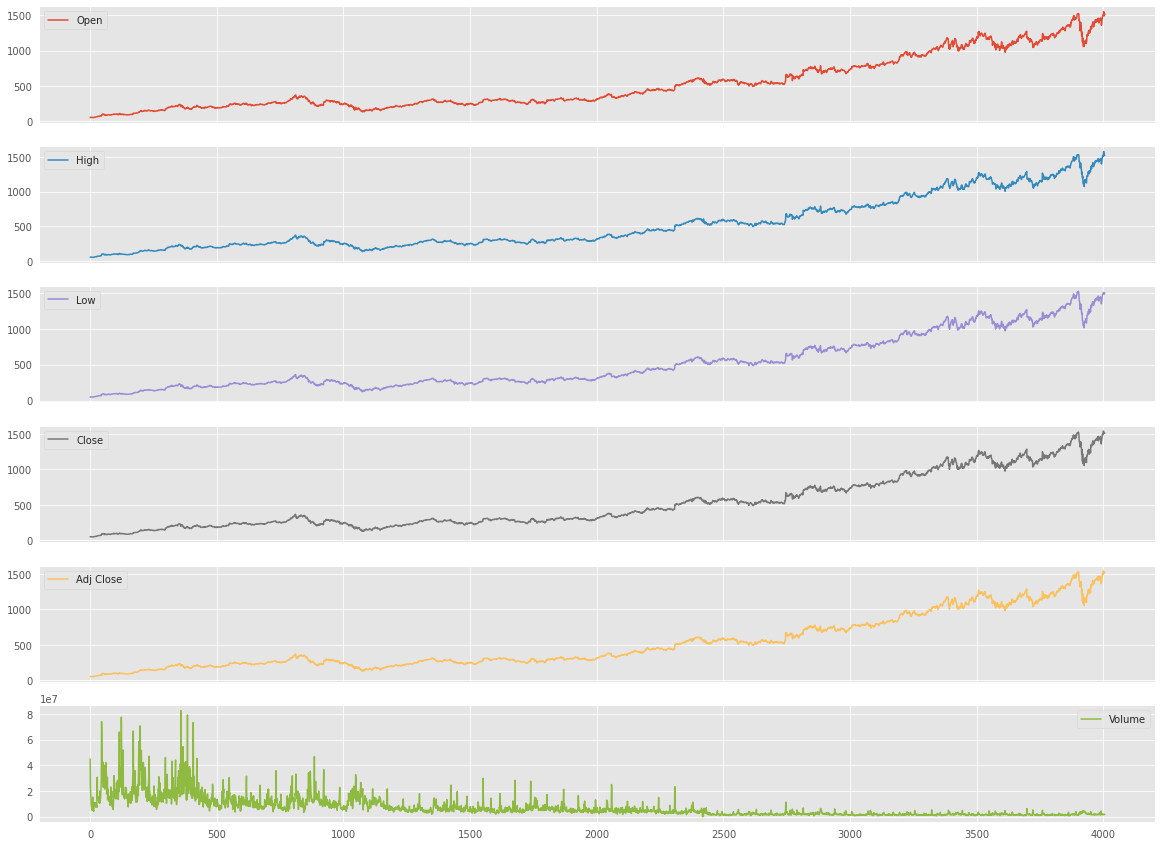

In [ ]:
#plotting dataset

dataset.plot(legend=True,subplots=True, figsize = (20, 15))
plt.show()

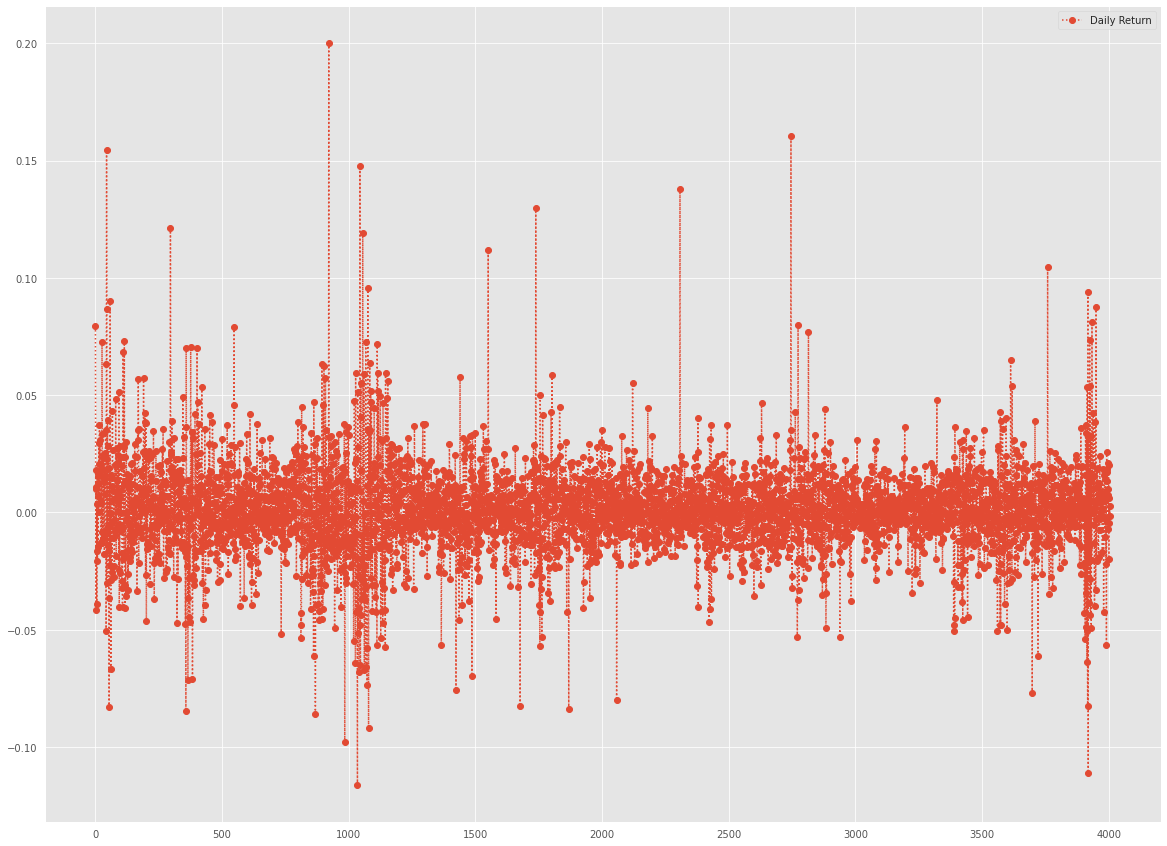

In [ ]:
#Adding moving averages to the dataset

m_avg_day = [10, 50 ,100]
for i in m_avg_day:
    column_name = 'M_avg for %s days' %(str(i))
    dataset[column_name] = pd.DataFrame.rolling(dataset['Close'],i).mean()

dataset['Daily Return'] = dataset['Close'].pct_change()

# plotting Daily Return

dataset['Daily Return'].plot(figsize=(20,15),legend=True,linestyle=':',marker='o')
plt.show()

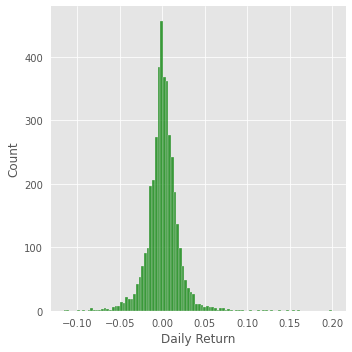

In [ ]:
sns.displot(dataset['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [ ]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,M_avg for 10 days,M_avg for 50 days,M_avg for 100 days,Daily Return
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300,519.073502,516.726428,514.343382,0.001037
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800,519.073502,516.726428,514.343382,0.079430
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800,519.073502,516.726428,514.343382,0.010064
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700,519.073502,516.726428,514.343382,-0.041408
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100,519.073502,516.726428,514.343382,0.010775


In [ ]:
dataset.nunique()

Date                  4006
Open                  3881
High                  3871
Low                   3904
Close                 3930
Adj Close             3930
Volume                3909
M_avg for 10 days     3997
M_avg for 50 days     3956
M_avg for 100 days    3907
Daily Return          4006
dtype: int64

In [ ]:
dataset.sort_index(axis=1,ascending=True)

,Adj Close,Close,Daily Return,Date,High,Low,M_avg for 10 days,M_avg for 100 days,M_avg for 50 days,Open,Volume
0,49.982655,49.982655,0.001037,2004-08-19,51.835709,47.800831,519.073502,514.343382,516.726428,49.813286,44871300
1,53.952770,53.952770,0.079430,2004-08-20,54.336334,50.062355,519.073502,514.343382,516.726428,50.316402,22942800
2,54.495735,54.495735,0.010064,2004-08-23,56.528118,54.321388,519.073502,514.343382,516.726428,55.168217,18342800
3,52.239193,52.239193,-0.041408,2004-08-24,55.591629,51.591621,519.073502,514.343382,516.726428,55.412300,15319700
4,52.802086,52.802086,0.010775,2004-08-25,53.798351,51.746044,519.073502,514.343382,516.726428,52.284027,9232100
...,...,...,...,...,...,...,...,...,...,...,...
4001,1511.339966,1511.339966,-0.019718,2020-07-13,1577.131958,1505.243042,1475.226990,1329.745349,1420.980295,1550.000000,1846400
4002,1520.579956,1520.579956,0.006114,2020-07-14,1522.949951,1483.500000,1487.787988,1329.769648,1424.979695,1490.310059,1585000
4003,1513.640015,1513.640015,-0.004564,2020-07-15,1535.329956,1498.000000,1497.790991,1330.054949,1428.716494,1523.130005,1610700
4004,1518.000000,1518.000000,0.002880,2020-07-16,1518.689941,1486.310059,1505.786987,1331.019049,1432.054294,1500.000000,1519300


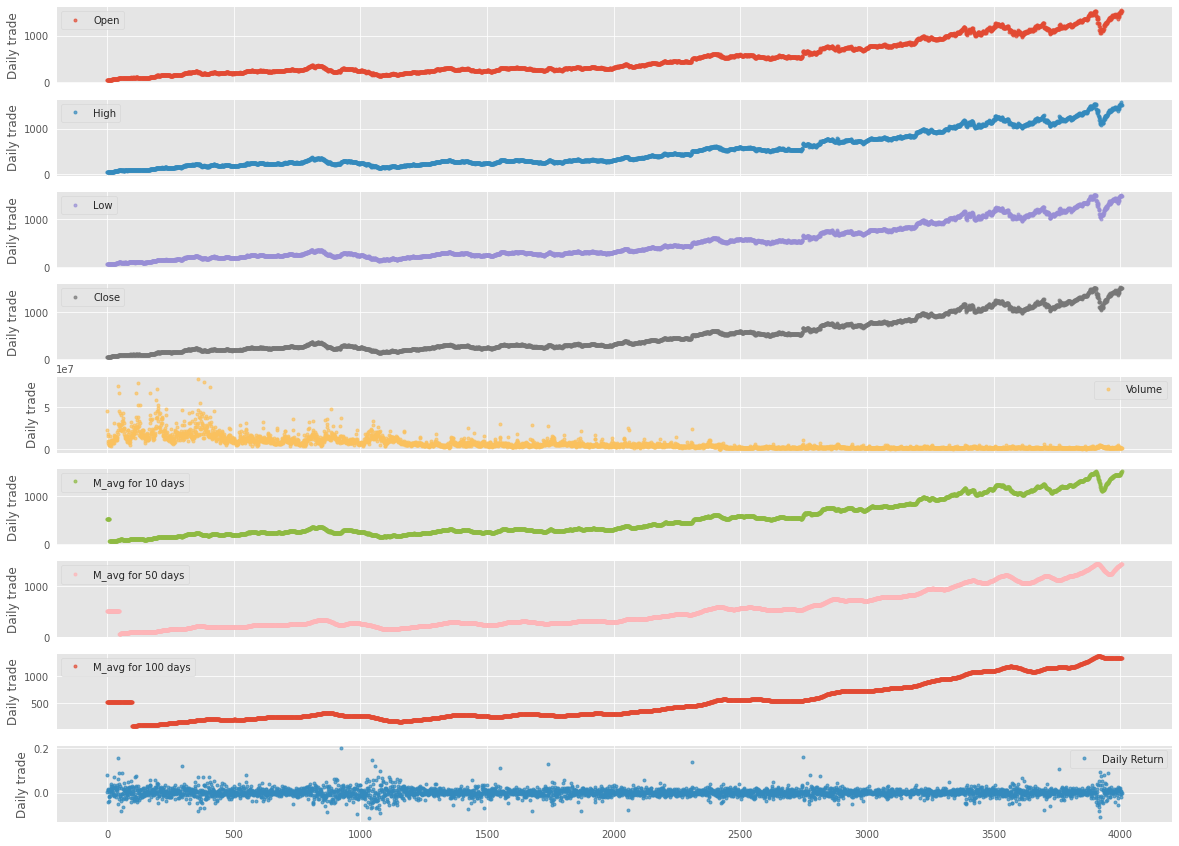

In [ ]:
# plotting every column of the dataset

cols_plot = ['Open', 'High', 'Low','Close','Volume','M_avg for 10 days','M_avg for 50 days','M_avg for 100 days','Daily Return']
axes = dataset[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(20, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Text(0, 0.5, 'Closing price')

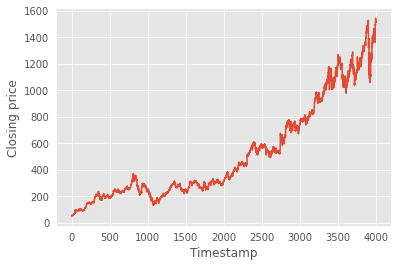

In [ ]:
# plotting Close price of the dataset

plt.plot(dataset['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

In [ ]:
df = dataset
print(df)

            Date         Open         High          Low        Close  \
0     2004-08-19    49.813286    51.835709    47.800831    49.982655   
1     2004-08-20    50.316402    54.336334    50.062355    53.952770   
2     2004-08-23    55.168217    56.528118    54.321388    54.495735   
3     2004-08-24    55.412300    55.591629    51.591621    52.239193   
4     2004-08-25    52.284027    53.798351    51.746044    52.802086   
...          ...          ...          ...          ...          ...   
4001  2020-07-13  1550.000000  1577.131958  1505.243042  1511.339966   
4002  2020-07-14  1490.310059  1522.949951  1483.500000  1520.579956   
4003  2020-07-15  1523.130005  1535.329956  1498.000000  1513.640015   
4004  2020-07-16  1500.000000  1518.689941  1486.310059  1518.000000   
4005  2020-07-17  1521.619995  1523.439941  1498.420044  1515.550049   

        Adj Close    Volume  M_avg for 10 days  M_avg for 50 days  \
0       49.982655  44871300         519.073502         516.726428 

In [ ]:
dataset.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
M_avg for 10 days     0
M_avg for 50 days     0
M_avg for 100 days    0
Daily Return          0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,4006.0,5.195886e+02,3.693803e+02,49.409801,2.394724e+02,3.365834e+02,7.588775e+02,1.550000e+03
High,4006.0,5.244739e+02,3.728301e+02,50.680038,2.416243e+02,3.391189e+02,7.673500e+02,1.577132e+03
Low,4006.0,5.145513e+02,3.662497e+02,47.800831,2.369755e+02,3.334252e+02,7.520900e+02,1.521400e+03
Close,4006.0,5.196698e+02,3.697949e+02,49.818268,2.394400e+02,3.373157e+02,7.595300e+02,1.541740e+03
Adj Close,4006.0,5.196698e+02,3.697949e+02,49.818268,2.394400e+02,3.373157e+02,7.595300e+02,1.541740e+03
Volume,4006.0,6.916466e+06,7.994278e+06,7900.000000,1.718900e+06,4.216250e+06,8.821450e+06,8.254150e+07
M_avg for 10 days,4006.0,5.190735e+02,3.677165e+02,50.999839,2.403368e+02,3.385186e+02,7.554013e+02,1.510872e+03
M_avg for 50 days,4006.0,5.167264e+02,3.594517e+02,63.286188,2.405905e+02,3.425671e+02,7.384151e+02,1.435419e+03
M_avg for 100 days,4006.0,5.143434e+02,3.511020e+02,76.899262,2.495649e+02,3.457554e+02,7.288320e+02,1.365525e+03
Daily Return,4006.0,1.036582e-03,1.928700e-02,-0.116091,-7.348273e-03,6.729545e-04,9.895063e-03,1.999154e-01


In [ ]:
df_close = df.reset_index()['Close']

In [ ]:
df_close

0         49.982655
1         53.952770
2         54.495735
3         52.239193
4         52.802086
           ...     
4001    1511.339966
4002    1520.579956
4003    1513.640015
4004    1518.000000
4005    1515.550049
Name: Close, Length: 4006, dtype: float64

In [ ]:
# scaling close price of the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close = pd.DataFrame(df_close)

In [ ]:
# Dividing training and test data for plotting

training_size = int(len(df_close)*0.75)
test_size = len(df_close)-training_size
train_data,test_data=df_close.iloc[0:training_size,0],df_close.iloc[training_size:,0]

In [ ]:
train_data

0       0.000110
1       0.002771
2       0.003135
3       0.001623
4       0.002000
          ...   
2999    0.460575
3000    0.463410
3001    0.461694
3002    0.464449
3003    0.462458
Name: 0, Length: 3004, dtype: float64

In [ ]:
test_data

3004    0.461554
3005    0.463799
3006    0.466574
3007    0.481910
3008    0.484651
          ...   
4001    0.979624
4002    0.985817
4003    0.981165
4004    0.984088
4005    0.982445
Name: 0, Length: 1002, dtype: float64

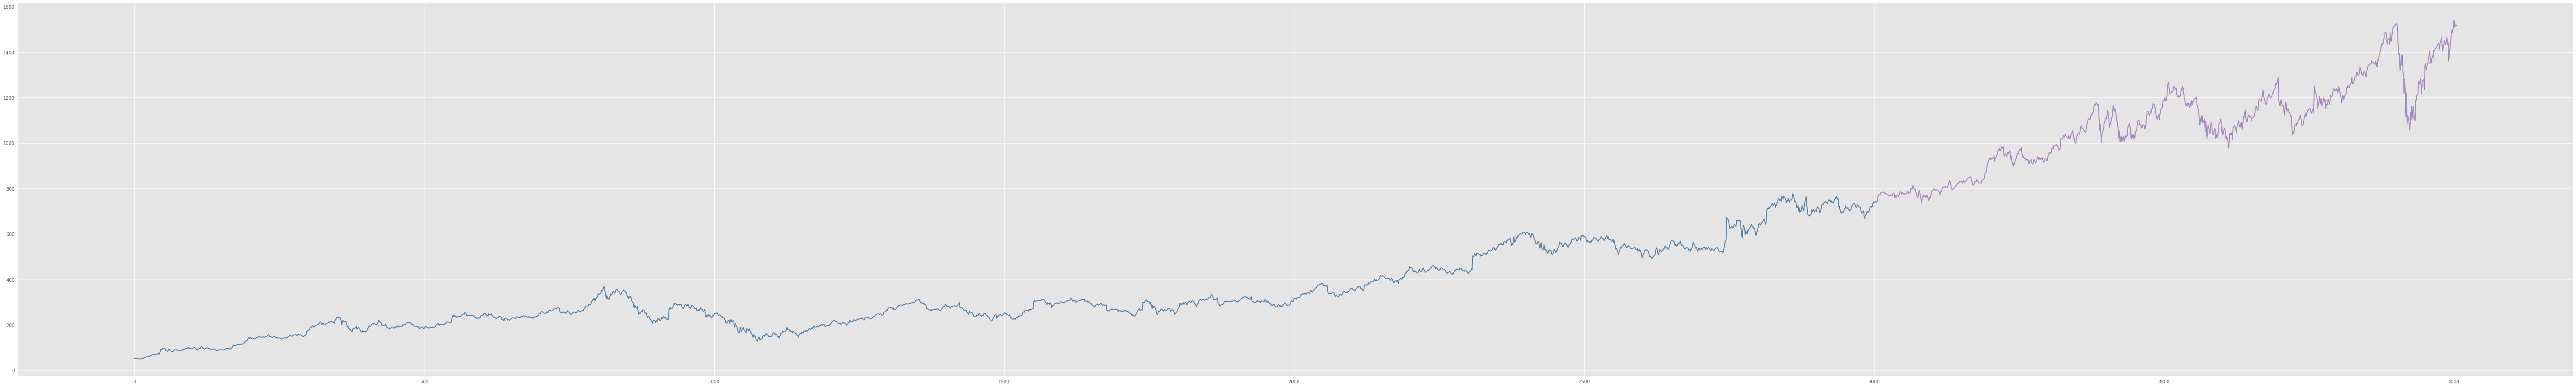

In [ ]:
# Plotting training data,test data, and close price of the dataset 
train_dataPlot = np.empty_like(df_close)
train_dataPlot[:, :] = np.nan
train_dataPlot[0:len(train_data),0] = train_data

test_dataPlot = np.empty_like(df_close)
test_dataPlot[:, :] = np.nan
test_dataPlot[len(train_data):len(df_close),0] = test_data

plt.figure(figsize=(100,15))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(scaler.inverse_transform(train_dataPlot))
plt.plot(scaler.inverse_transform(test_dataPlot))

plt.show()

In [ ]:
#preparing data in time series format with the help of time step

X = []
Y = []
time_step=100
for i in range(1 , len(df_close) - time_step -1 , 1):
    temp = []
    temp2 = []
    for j in range(time_step):
        temp.append(df_close.iloc[i + j, 0])
    temp2.append(df_close.iloc[i + time_step, 0])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [ ]:
#splitting data into train and test for prediction

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

In [ ]:
#reshaping data

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
# model layers including CNN and LSTM

cnn_lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Flatten()),
    
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='linear')

])

In [ ]:
#compiling and training the model

cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = cnn_lstm_model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
79/79 [==============================] - 6s 23ms/step - loss: 0.0150 - mse: 0.0150 - mae: 0.0704 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0245
Epoch 2/40
79/79 [==============================] - 1s 11ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0403 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0277
Epoch 3/40
79/79 [==============================] - 1s 11ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0383 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0222
Epoch 4/40
79/79 [==============================] - 1s 11ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0360 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0229
Epoch 5/40
79/79 [==============================] - 1s 12ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0348 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0286
Epoch 6/40
79/79 [==============================] - 1s 13ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0336 - val_loss: 9.1129e-04 - val_mse: 9.1129e-04 - val_mae: 0.0198
Epoch 7/40
79/

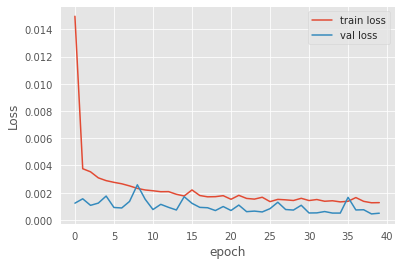

In [ ]:
#plotting training and validation loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

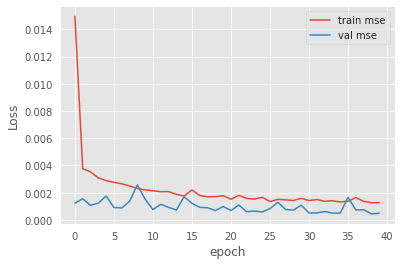

In [ ]:
#plotting training and validation MSE

plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


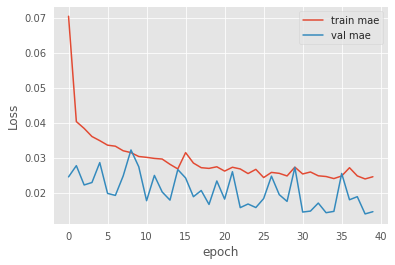

In [ ]:
#plotting training and validation MAE

plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#summary of the CNN-LSTM model

from tensorflow.keras.utils import plot_model
print(cnn_lstm_model.summary())
# plot_model(cnn_lstm_model, to_file='CNN_LSTM_Model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_38 (TimeDis (None, 1, 98, 64)         256       
_________________________________________________________________
time_distributed_39 (TimeDis (None, 1, 49, 64)         0         
_________________________________________________________________
time_distributed_40 (TimeDis (None, 1, 47, 128)        24704     
_________________________________________________________________
time_distributed_41 (TimeDis (None, 1, 23, 128)        0         
_________________________________________________________________
time_distributed_42 (TimeDis (None, 1, 21, 128)        49280     
_________________________________________________________________
time_distributed_43 (TimeDis (None, 1, 10, 128)        0         
_________________________________________________________________
time_distributed_44 (TimeDis (None, 1, 1280)          

In [ ]:
# evaluating the model

cnn_lstm_model.evaluate(test_X, test_Y)

25/25 [==============================] - 0s 3ms/step - loss: 4.9019e-04 - mse: 4.9019e-04 - mae: 0.0145


[0.0004901891225017607, 0.0004901891225017607, 0.014537638053297997]

In [ ]:
# calculating variance, R2 score and Max error of the model

from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

y_pred_prob = cnn_lstm_model.predict(test_X, verbose=0)
y_pred_prob = y_pred_prob[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), y_pred_prob)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), y_pred_prob)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), y_pred_prob)
print('Max Error: %f' % var2)

Variance: 0.992082
R2 Score: 0.992082
Max Error: 0.152619


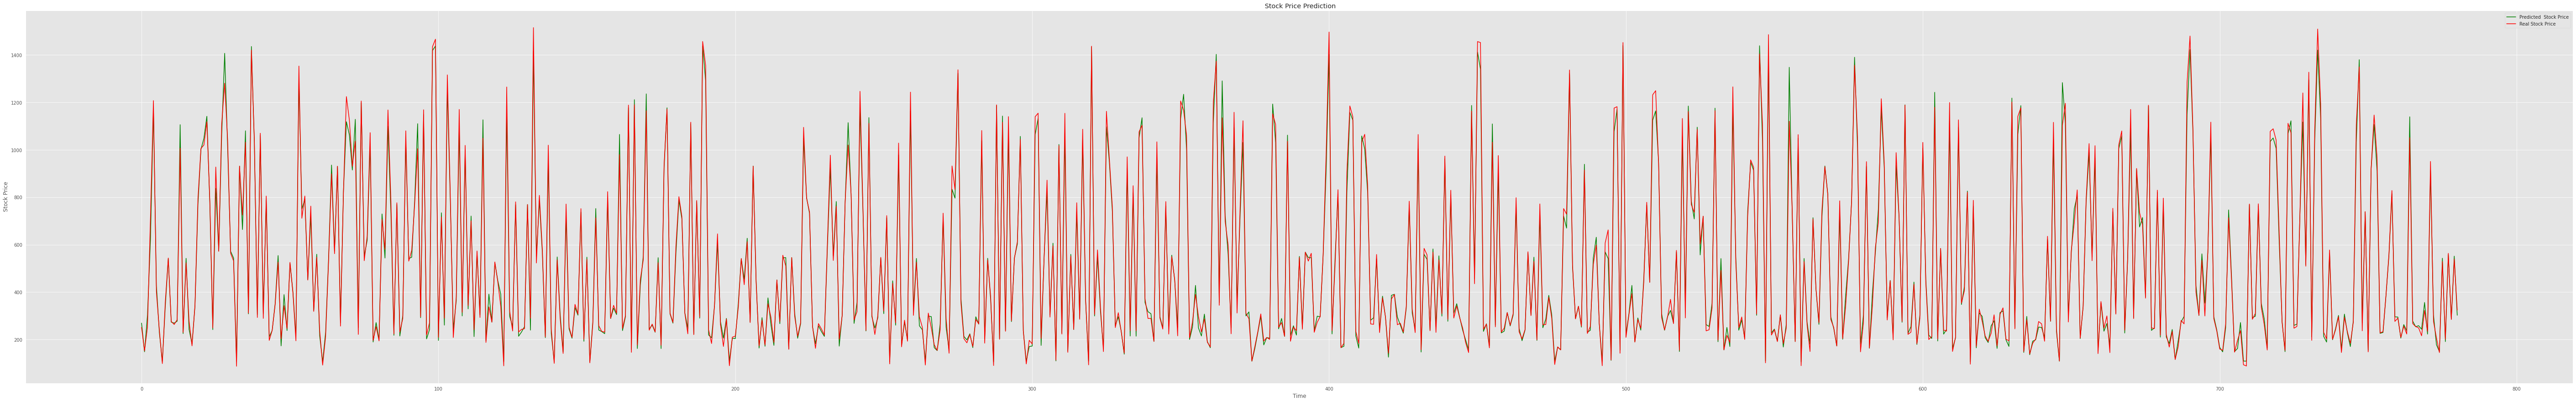

In [ ]:
# plotting predicted value and test label

from pylab import rcParams
rcParams['figure.figsize'] = [100,15]

predicted  = cnn_lstm_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_train = len(train_X)
plt.plot(scaler.inverse_transform(predicted), color = 'green', label = 'Predicted  Stock Price')
plt.plot(scaler.inverse_transform(test_label), color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
scaler.inverse_transform(predicted)

array([[ 269.3579  ],
       [ 148.47604 ],
       [ 303.3928  ],
       [ 622.6345  ],
       [1174.167   ],
       [ 427.42175 ],
       [ 229.00961 ],
       [ 108.19828 ],
       [ 340.80438 ],
       [ 541.047   ],
       [ 273.4755  ],
       [ 269.23682 ],
       [ 277.52237 ],
       [1105.641   ],
       [ 225.08557 ],
       [ 542.3895  ],
       [ 242.77623 ],
       [ 181.44551 ],
       [ 341.5336  ],
       [ 770.2341  ],
       [1000.9201  ],
       [1047.8765  ],
       [1140.9252  ],
       [ 771.7077  ],
       [ 241.70314 ],
       [ 837.3356  ],
       [ 572.9851  ],
       [1065.0256  ],
       [1406.4829  ],
       [1008.6016  ],
       [ 572.05176 ],
       [ 543.6218  ],
       [ 108.13178 ],
       [ 931.2359  ],
       [ 663.6267  ],
       [1079.8463  ],
       [ 308.24023 ],
       [1435.1829  ],
       [1026.672   ],
       [ 305.22464 ],
       [1060.5547  ],
       [ 309.5444  ],
       [ 788.15375 ],
       [ 211.84457 ],
       [ 238.06876 ],
       [ 3

In [ ]:
scaler.inverse_transform(test_label)

array([[ 251.422607],
       [ 152.413712],
       [ 252.453735],
       [ 712.780029],
       [1207.150024],
       [ 399.831329],
       [ 239.631805],
       [  98.834541],
       [ 359.04422 ],
       [ 543.567627],
       [ 276.259521],
       [ 263.432587],
       [ 283.915802],
       [1006.469971],
       [ 230.052704],
       [ 523.373108],
       [ 278.192261],
       [ 173.444885],
       [ 345.729126],
       [ 794.559998],
       [1005.150024],
       [1020.      ],
       [1117.949951],
       [ 784.539978],
       [ 249.106293],
       [ 927.130005],
       [ 571.909851],
       [1110.75    ],
       [1280.390015],
       [1040.47998 ],
       [ 563.522827],
       [ 531.630432],
       [  87.47213 ],
       [ 930.830017],
       [ 724.890015],
       [1031.640015],
       [ 311.372894],
       [1419.849976],
       [1037.310059],
       [ 292.996765],
       [1069.52002 ],
       [ 289.121307],
       [ 804.789978],
       [ 196.413788],
       [ 238.645493],
       [ 3